### BUSINESS UNDERSTANDING 

This project entails to uncover the most consumed foods in Kenya and their increased costs over time. The analysis enables us to uncover food security issues and where the most consumed food is critical. Keep in mind the level of climate changes, population growth and natural disasters contribute to food security issues.

### DATA SOURCES

- Food and Agriculture Organization (FAO) provides data on food security, including access to fresh food, food prices, and food insecurity.

### Objectives 

- To identify the most consumed foods in Kenya and their increased costs over time.
- To investigate the relationship between food prices and food security.
- To assess the impact of climate change, population growth, and natural disasters on food security.

### Hypothesis

- The most consumed foods in Kenya will increase in price over time.

### Data analysis questions 

- How have food prices evolved over time for specific commodities?
- Which commodities have seen the most significant price increases over time?
- Which regions have the highest or the lowest food prices?
- Impact of currency fluctuation on local vs USD prices?
- Which is the most least and expensive categories?

### DATA UNDERSTANDING 
Dataset contains 14 columns with 14,094 rows, and it includes information on food prices across various markets in Kenya. Here’s a quick breakdown of the columns:

|Column|Description|
|:----------------:| :----------------:|
|Date| Indicates when the data was recorded|
|Admin1 and Admin2| Administrative region information.|
|Market| Specific market location.|
|Latitude and Longitude| Geographical coordinates of the markets.|
|Category| Food categories (e.g., cereals, tubers).|
|Commodity| Specific food item (e.g., maize, beans).|
|Unit|Unit of measurement (e.g., KG, 90 KG).|
|Priceflag| Type of price (e.g., actual).|
|Pricetype| Price type (e.g., Wholesale).|
|Currency| Currency in which the price is recorded.|
|Price|Local currency price.|
|USD Price| Price converted to USD.|

- Perform EDA analysis. 
  - Identify missing values and outliers.
  - Analyze the distribution of food prices and access to fresh food.
  - Visualize the regional location and access to food. 

In [9]:
##Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
## Load the data

df= pd.read_csv("data/wfp_food_prices_ken.csv")

df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,1/15/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235
2,1/15/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480,20.5041
3,1/15/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659
4,1/15/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246,44.9705


In [11]:
## Check the data types

df.dtypes

date         object
admin1       object
admin2       object
market       object
latitude     object
longitude    object
category     object
commodity    object
unit         object
priceflag    object
pricetype    object
currency     object
price        object
usdprice     object
dtype: object

In [12]:
## Check for missing values

df.isna().sum()

date          0
admin1       57
admin2       57
market        0
latitude     57
longitude    57
category      0
commodity     0
unit          0
priceflag     0
pricetype     0
currency      0
price         0
usdprice      0
dtype: int64

In [13]:
## Check for duplicates

df.duplicated().sum()

np.int64(0)

In [14]:
##Check for size of the data 

df.shape

(14094, 14)

In [15]:
## Check for unique values

df.nunique()

date           229
admin1           8
admin2          22
market          63
latitude        62
longitude       62
category         9
commodity       48
unit            15
priceflag        3
pricetype        3
currency         2
price         6263
usdprice     10494
dtype: int64

In [16]:
## Check for statistical summary

df.describe().T

,count,unique,top,freq
date,14094,229,4/15/2021,461
admin1,14037,8,Rift Valley,5543
admin2,14037,22,Nairobi,2887
market,14094,63,Nairobi,1417
latitude,14037,62,-1.283333,1417
longitude,14037,62,36.816667,1417
category,14094,9,cereals and tubers,7010
commodity,14094,48,Maize (white),1463
unit,14094,15,KG,5951
priceflag,14094,3,actual,9211


## Tasks 

- Convert price object to numeric.
  df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
- Convert date column to date time.
  df['Date'] = pd.to_datetime(df['Date'])
- drop missing values and unnecessary columns 
  df.dropna(inplace=True)

In [17]:
## Drop rows

df = df.drop(index=0)

df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,1/15/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235
2,1/15/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480,20.5041
3,1/15/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659
4,1/15/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246,44.9705
5,1/15/2006,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Potatoes (Irish),50 KG,actual,Wholesale,KES,1249.99,17.3175


In [18]:
## Convert the date column to datetime

df['date'] = pd.to_datetime(df['date'])

df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235
2,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480,20.5041
3,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659
4,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246,44.9705
5,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Potatoes (Irish),50 KG,actual,Wholesale,KES,1249.99,17.3175


In [19]:
## Convert the price column to numeric

df['price'] = pd.to_numeric(df['price'], errors='coerce')

df.head()


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235
2,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480.00,20.5041
3,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659
4,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246.00,44.9705
5,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Potatoes (Irish),50 KG,actual,Wholesale,KES,1249.99,17.3175


In [20]:
df['usdprice'] = pd.to_numeric(df['usdprice'], errors='coerce')

df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235
2,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480.00,20.5041
3,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659
4,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246.00,44.9705
5,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Potatoes (Irish),50 KG,actual,Wholesale,KES,1249.99,17.3175


In [21]:
## Check for data types

df.dtypes

date         datetime64[ns]
admin1               object
admin2               object
market               object
latitude             object
longitude            object
category             object
commodity            object
unit                 object
priceflag            object
pricetype            object
currency             object
price               float64
usdprice            float64
dtype: object

In [22]:
## Drop missing values and unnecessary columns

df = df.dropna()

df.isna().sum()

date         0
admin1       0
admin2       0
market       0
latitude     0
longitude    0
category     0
commodity    0
unit         0
priceflag    0
pricetype    0
currency     0
price        0
usdprice     0
dtype: int64

In [23]:
## Create a copy 
data = df.copy()

data.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235
2,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480.00,20.5041
3,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659
4,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246.00,44.9705
5,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Potatoes (Irish),50 KG,actual,Wholesale,KES,1249.99,17.3175


In [24]:
## Drop the unnecessary columns

data = data.drop(columns=['latitude','longitude'], axis=1)

data.head()

,date,admin1,admin2,market,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,2006-01-15,Coast,Mombasa,Mombasa,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235
2,2006-01-15,Coast,Mombasa,Mombasa,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480.00,20.5041
3,2006-01-15,Coast,Mombasa,Mombasa,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659
4,2006-01-15,Coast,Mombasa,Mombasa,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246.00,44.9705
5,2006-01-15,Eastern,Kitui,Kitui,cereals and tubers,Potatoes (Irish),50 KG,actual,Wholesale,KES,1249.99,17.3175


### Data visualization 

<Axes: ylabel='price'>

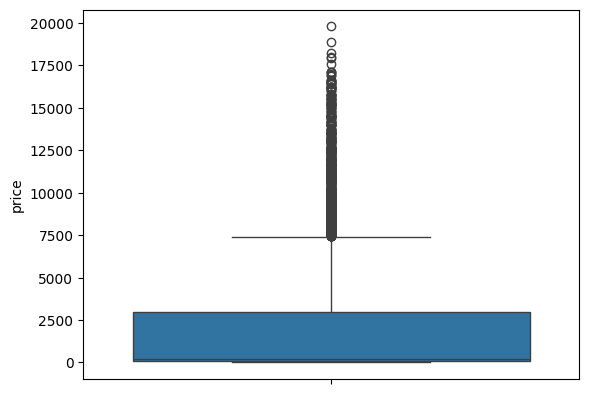

In [25]:
## Check for outliers

sns.boxplot(data['price'])

<Figure size 1000x400 with 0 Axes>

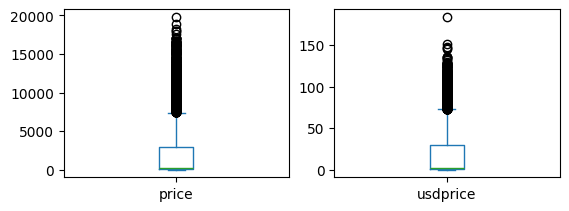

In [26]:
plt.figure(figsize=(10,4))
data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.title('Distribution of Price')
plt.show()

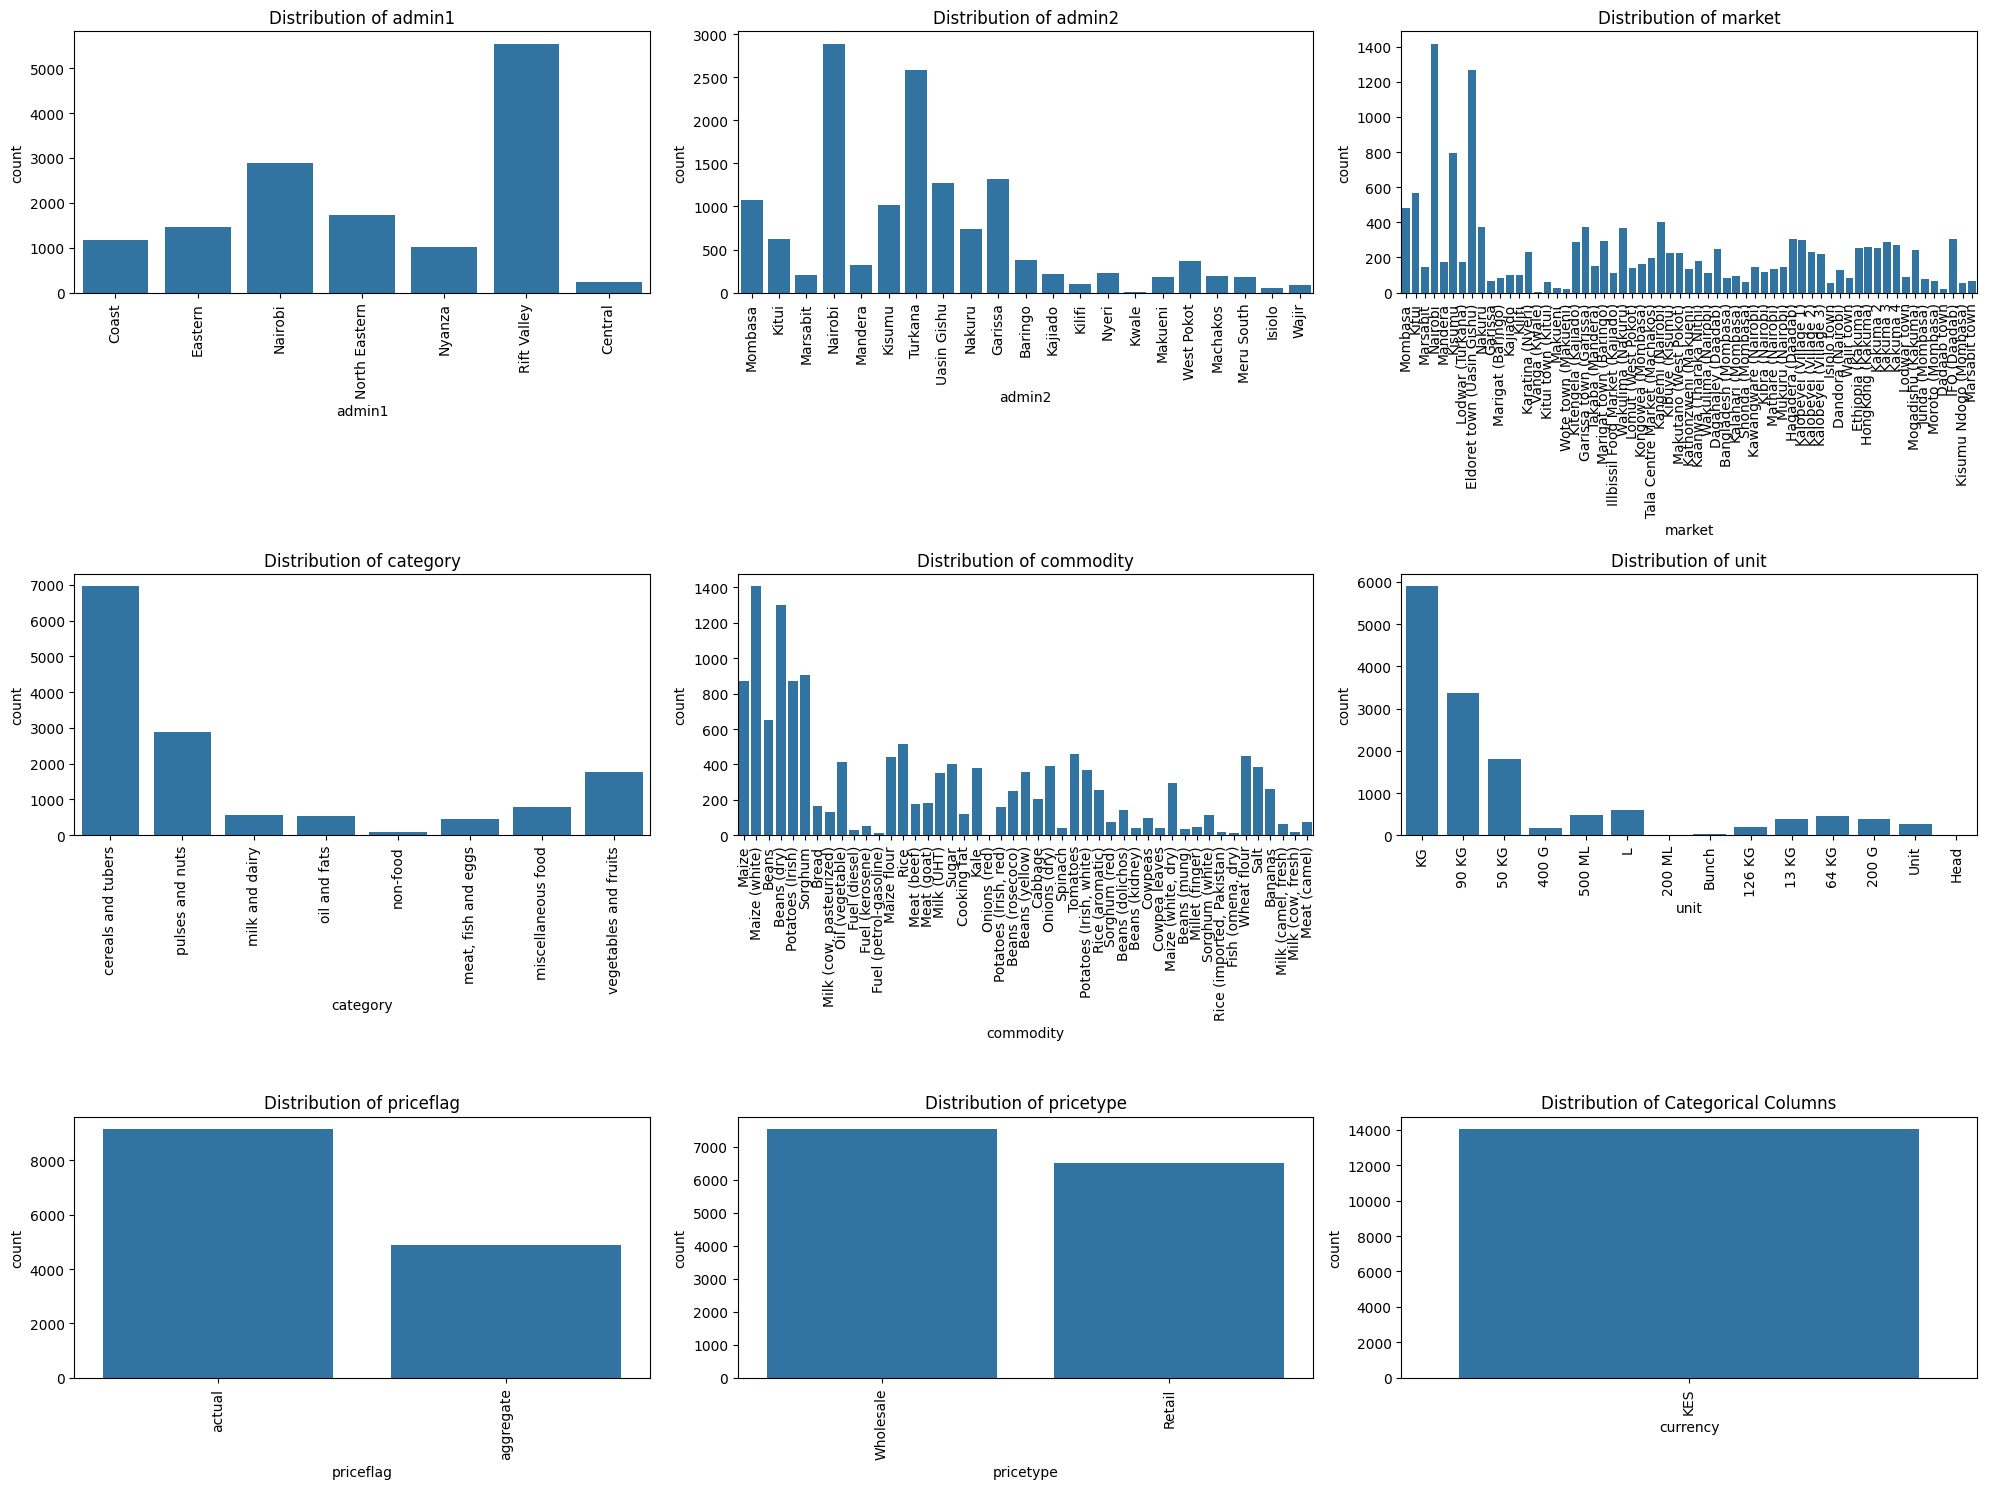

In [27]:
## Visualizing the categorical columns
categorical_columns = ['admin1', 'admin2', 'market', 'category', 'commodity', 'unit', 'priceflag', 'pricetype', 'currency']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(data=data, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.title("Distribution of Categorical Columns")
plt.show()

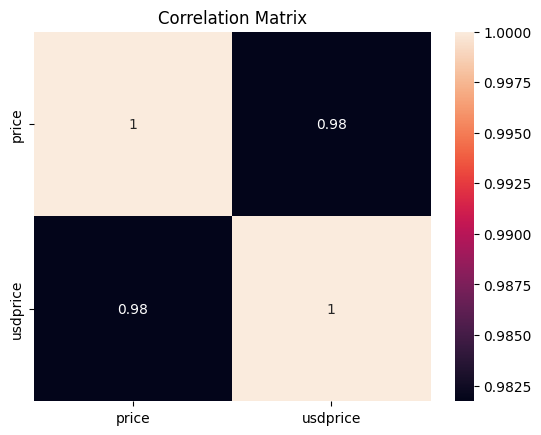

In [28]:
## Check for the correlation 

correlation = data.corr(numeric_only=True)

sns.heatmap(correlation, annot=True)
plt.title('Correlation Matrix')
plt.show()

#### Bivariate distributions

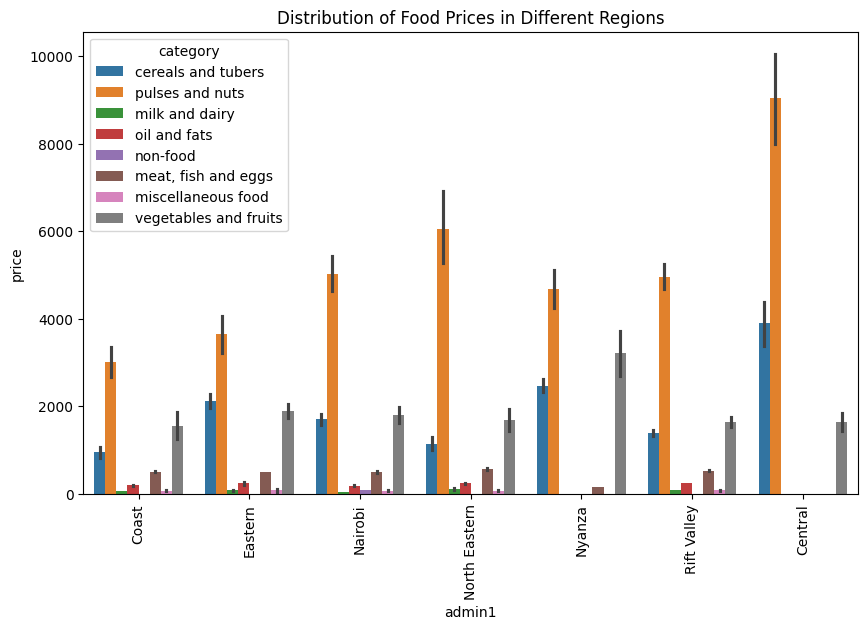

In [29]:
## Regions with high distribution of food prices

plt.figure(figsize=(10,6))
sns.barplot(data, x='admin1', y='price', hue='category')
plt.title('Distribution of Food Prices in Different Regions')
plt.xticks(rotation=90)
plt.show()

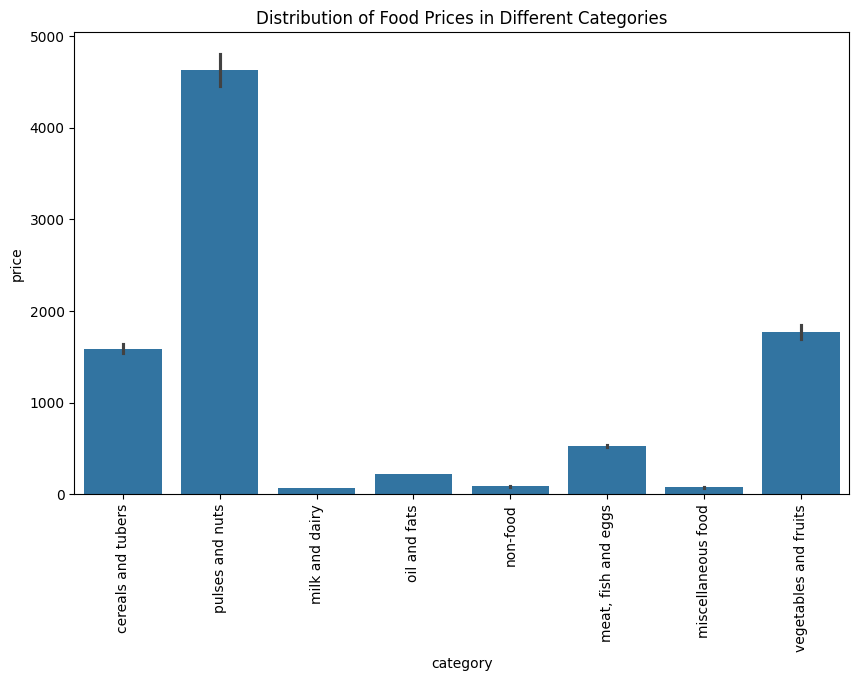

In [30]:
## Categories of food prices

plt.figure(figsize=(10,6))
sns.barplot(data, x='category', y='price')
plt.title('Distribution of Food Prices in Different Categories')
plt.xticks(rotation=90)
plt.show()

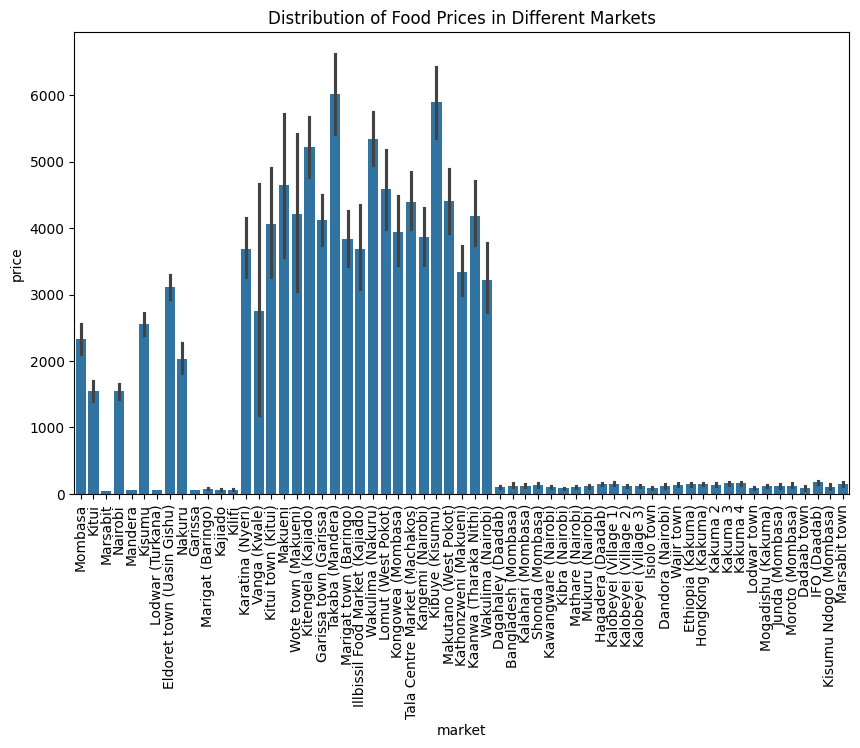

In [31]:
## distribution of food prices in different markets

plt.figure(figsize=(10,6))
sns.barplot(data, x='market', y='price')
plt.title('Distribution of Food Prices in Different Markets')
plt.xticks(rotation=90)
plt.show()

#### Data analysis questions
- How have food prices evolved over time for specific commodities?
- Which commodities have seen the most significant price increases over time?
- Which regions have the highest or the lowest food prices?
- Impact of currency fluctuation on local vs USD prices?
- Which is the most least and expensive categories?

#### 1. How have food prices evolved over time for specific commodities?

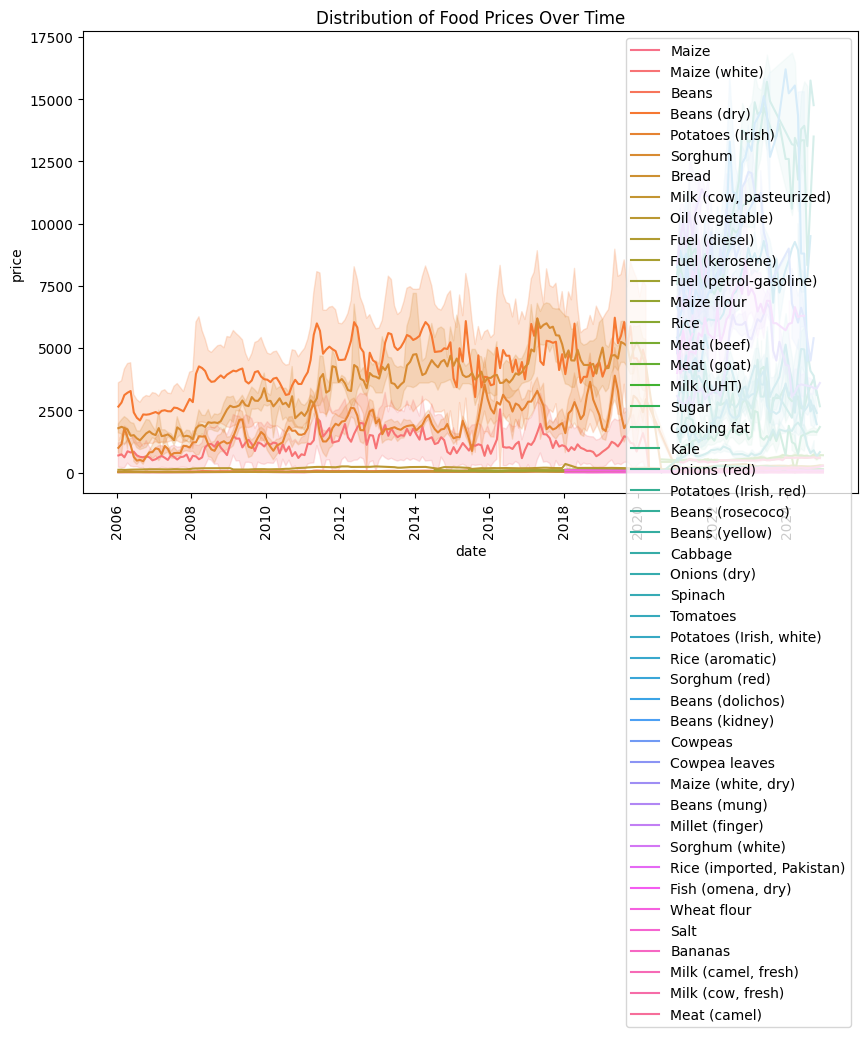

In [37]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data, x='date', y='price' ,hue='commodity')
plt.title('Distribution of Food Prices Over Time')
plt.xticks(rotation=90)
plt.legend(loc= 'upper right')
plt.show()

In [39]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

data.head()

,date,admin1,admin2,market,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,year,month,day
1,2006-01-15,Coast,Mombasa,Mombasa,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235,2006,1,15
2,2006-01-15,Coast,Mombasa,Mombasa,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480.00,20.5041,2006,1,15
3,2006-01-15,Coast,Mombasa,Mombasa,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659,2006,1,15
4,2006-01-15,Coast,Mombasa,Mombasa,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246.00,44.9705,2006,1,15
5,2006-01-15,Eastern,Kitui,Kitui,cereals and tubers,Potatoes (Irish),50 KG,actual,Wholesale,KES,1249.99,17.3175,2006,1,15


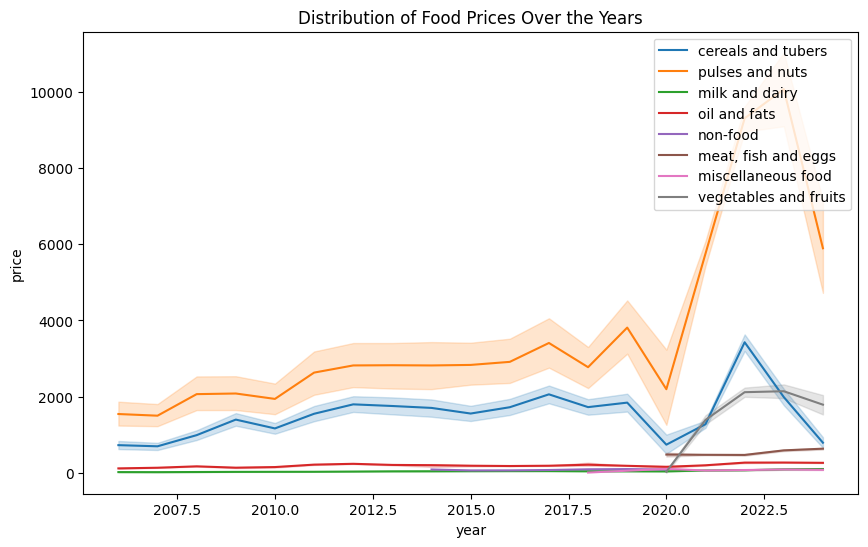

In [42]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data, x='year', y='price', hue='category')
plt.title('Distribution of Food Prices by category Over the Years')
plt.legend(loc='upper right')
plt.show()

In [38]:
# df_time_series = data.pivot_table(index='date', columns='commodity', values='price')
# df_time_series
# df_time_series.plot(figsize=(15,10))
# plt.title('Food Prices Over Time for Specific Commodities')
# plt.show()

#### 2. Which region have the highest or lowest food prices

In [44]:
# Group by region and calculate the mean price
region_prices = data.groupby('admin1')['price'].mean().reset_index()

# Sort the regions by price
region_prices = region_prices.sort_values(by='price', ascending=False)

# Display the regions with the highest and lowest food prices
print("Regions with the highest food prices:")
print(region_prices.head())

print("\nRegions with the lowest food prices:")
print(region_prices.tail())

Regions with the highest food prices:
        admin1        price
0      Central  3692.184478
5       Nyanza  3291.145700
2      Eastern  2358.697350
3      Nairobi  1967.078330
6  Rift Valley  1842.053592

Regions with the lowest food prices:
          admin1        price
2        Eastern  2358.697350
3        Nairobi  1967.078330
6    Rift Valley  1842.053592
1          Coast  1559.789108
4  North Eastern  1495.448186


#### 3. Impact of currency fluctuation on local vs USD prices 

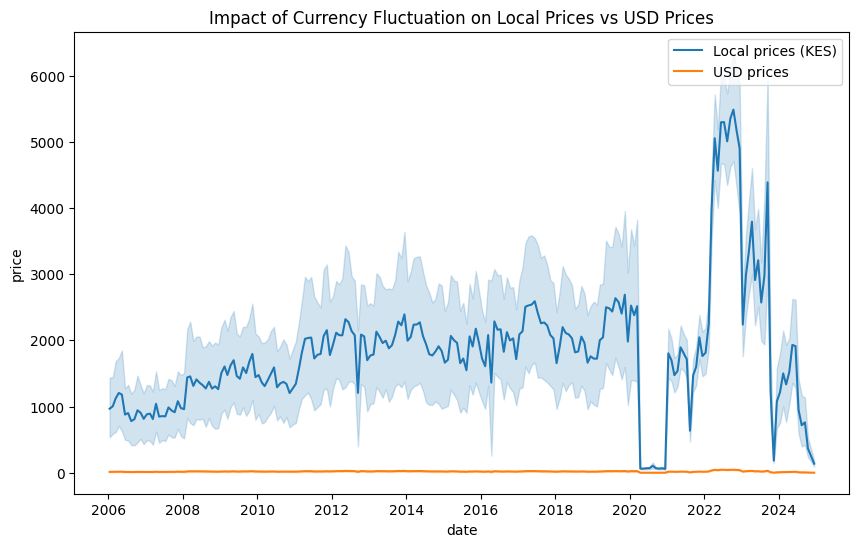

In [46]:
plt.figure(figsize=(10,6))

# Plot local prices
sns.lineplot(data=data, x='date', y='price', label= 'Local prices (KES)')

# Plot USD prices
sns.lineplot(data=data, x='date', y='usdprice', label= 'USD prices')

plt.title('Impact of Currency Fluctuation on Local Prices vs USD Prices')
plt.legend(loc='upper right')
plt.show()

#### 4. Which is the most least and expensive category

In [50]:
category_prices = data.groupby('category')['price'].mean().reset_index()

category_prices = category_prices.sort_values(by='price', ascending=False)

print (category_prices)

print("------------------------")

print("Categories with the highest food prices:")
print(category_prices.head())

print("------------------------")

print("\nCategories with the lowest food prices:")
print(category_prices.tail())

                category        price
6        pulses and nuts  4634.866420
7  vegetables and fruits  1770.086142
0     cereals and tubers  1585.862320
1    meat, fish and eggs   525.774865
5           oil and fats   218.203876
4               non-food    84.112857
3     miscellaneous food    74.694994
2         milk and dairy    66.692681
------------------------
Categories with the highest food prices:
                category        price
6        pulses and nuts  4634.866420
7  vegetables and fruits  1770.086142
0     cereals and tubers  1585.862320
1    meat, fish and eggs   525.774865
5           oil and fats   218.203876
------------------------

Categories with the lowest food prices:
              category       price
1  meat, fish and eggs  525.774865
5         oil and fats  218.203876
4             non-food   84.112857
3   miscellaneous food   74.694994
2       milk and dairy   66.692681


#### 5. Which commodities have seen the most significance price increase over time

In [51]:
# Calculate the percentage change in price for each commodity
price_change = data.groupby('commodity')['price'].agg(['first', 'last'])
price_change['percentage_change'] = ((price_change['last'] - price_change['first']) / price_change['first']) * 100

# Sort the commodities by the percentage change
price_change = price_change.sort_values(by='percentage_change', ascending=False)

# Display the commodities with the most significant price increase
print("Commodities with the most significant price increase:")
print(price_change.head())

# Display the commodities with the most significant price decrease
print("\nCommodities with the most significant price decrease:")
print(price_change.tail())

Commodities with the most significant price increase:
               first  last  percentage_change
commodity                                    
Maize          16.13  70.0         333.973962
Cowpea leaves  10.00  40.0         300.000000
Milk (UHT)     27.00  95.0         251.851852
Kale            6.00  20.0         233.333333
Spinach        15.00  43.0         186.666667

Commodities with the most significant price decrease:
                    first    last  percentage_change
commodity                                           
Potatoes (Irish)  1249.99   69.23         -94.461556
Maize (white)     1480.00   65.00         -95.608108
Sorghum           1800.00   70.00         -96.111111
Beans (dry)       3246.00  122.73         -96.219039
Cabbage           1890.00   65.00         -96.560847


In [53]:
## Print the full list of percentage change in price for each commodity
price_change

,first,last,percentage_change
commodity,,,
Maize,16.13,70.00,333.973962
Cowpea leaves,10.00,40.00,300.000000
Milk (UHT),27.00,95.00,251.851852
Kale,6.00,20.00,233.333333
Spinach,15.00,43.00,186.666667
Oil (vegetable),115.00,325.00,182.608696
"Milk (camel, fresh)",100.00,280.00,180.000000
"Milk (cow, fresh)",80.00,195.00,143.750000
"Milk (cow, pasteurized)",22.00,48.35,119.772727


### HYPOTHESIS